In [ ]:
# Step 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Step 3 Data Understanding

# Check shape and info
print(data.shape)
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Check unique values
print(data['Fuel_Type'].unique())
print(data['Selling_type'].unique())
print(data['Transmission'].unique())

(301, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64
['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [ ]:
# Step 2 Load Dataset

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file (replace path if needed)
data = pd.read_csv("car data.csv")

# Display first few rows
print(data.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [ ]:
# Step 4 Feature Engineering

# Create new column: Current Year
data['Current_Year'] = 2025

# Calculate number of years used
data['Car_Age'] = data['Current_Year'] - data['Year']

# Drop unnecessary columns
data.drop(['Year', 'Current_Year'], axis=1, inplace=True)

# Convert categorical variables into dummy variables
data = pd.get_dummies(data, drop_first=True)

print(data.head())

   Selling_Price  Present_Price  Driven_kms  Owner  Car_Age  \
0           3.35           5.59       27000      0       11   
1           4.75           9.54       43000      0       12   
2           7.25           9.85        6900      0        8   
3           2.85           4.15        5200      0       14   
4           4.60           6.87       42450      0       11   

   Car_Name_Activa 3g  Car_Name_Activa 4g  Car_Name_Bajaj  ct 100  \
0               False               False                   False   
1               False               False                   False   
2               False               False                   False   
3               False               False                   False   
4               False               False                   False   

   Car_Name_Bajaj Avenger 150  Car_Name_Bajaj Avenger 150 street  ...  \
0                       False                              False  ...   
1                       False                              F

In [ ]:
# Step 5 Define Input (X) and Output (Y)

# X = features, y = target
X = data.drop(['Selling_Price'], axis=1)
y = data['Selling_Price']

In [ ]:
# Step 6 Train-Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 7 Model Training (Random Forest Regressor)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Step 8 Prediction and Evaluation

# Predict on test data
predictions = model.predict(X_test)

# Compare
from sklearn.metrics import r2_score, mean_absolute_error

print("R2 Score:", r2_score(y_test, predictions))
print("Mean Absolute Error:", mean_absolute_error(y_test, predictions))

R2 Score: 0.9639271285853968
Mean Absolute Error: 0.6170163934426232


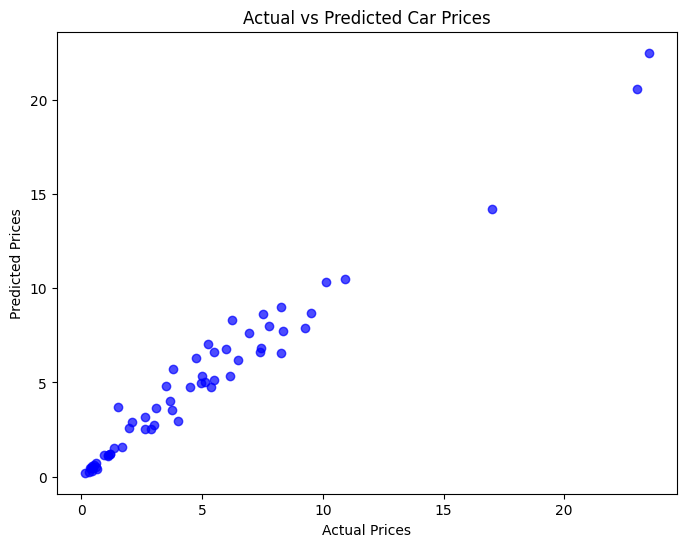

In [ ]:
# Step 9 Visualization

plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, alpha=0.7, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices")
plt.show()